# Training with ImageDataGenerator

### download the dataset horse-or-human.zip

In [ ]:
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5

Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: /content/horse-or-human.zip
100% 150M/150M [00:00<00:00, 195MB/s]


unzip the archive using the zipfile module

In [ ]:
import zipfile

# Unzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

We will not label the images as horses or humans. We will use the ImageDataGenerator API instead.

Define each of these directories

In [ ]:
import os

# Directory with training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse49-9.png', 'horse14-3.png', 'horse28-7.png', 'horse49-4.png', 'horse49-6.png', 'horse06-7.png', 'horse30-7.png', 'horse17-8.png', 'horse11-4.png', 'horse48-5.png']
['human03-07.png', 'human02-16.png', 'human05-14.png', 'human14-13.png', 'human13-25.png', 'human17-05.png', 'human11-06.png', 'human16-18.png', 'human10-16.png', 'human03-28.png']


Find out total number of horse and human images

In [ ]:
print('training horse images:', len(os.listdir(train_horse_dir)))
print('training human images:', len(os.listdir(train_human_dir)))

training horse images: 500
training human images: 527


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

Display a batch of 8 horse and 8 human pictures. You can rerun the cell to see a fresh batch each time

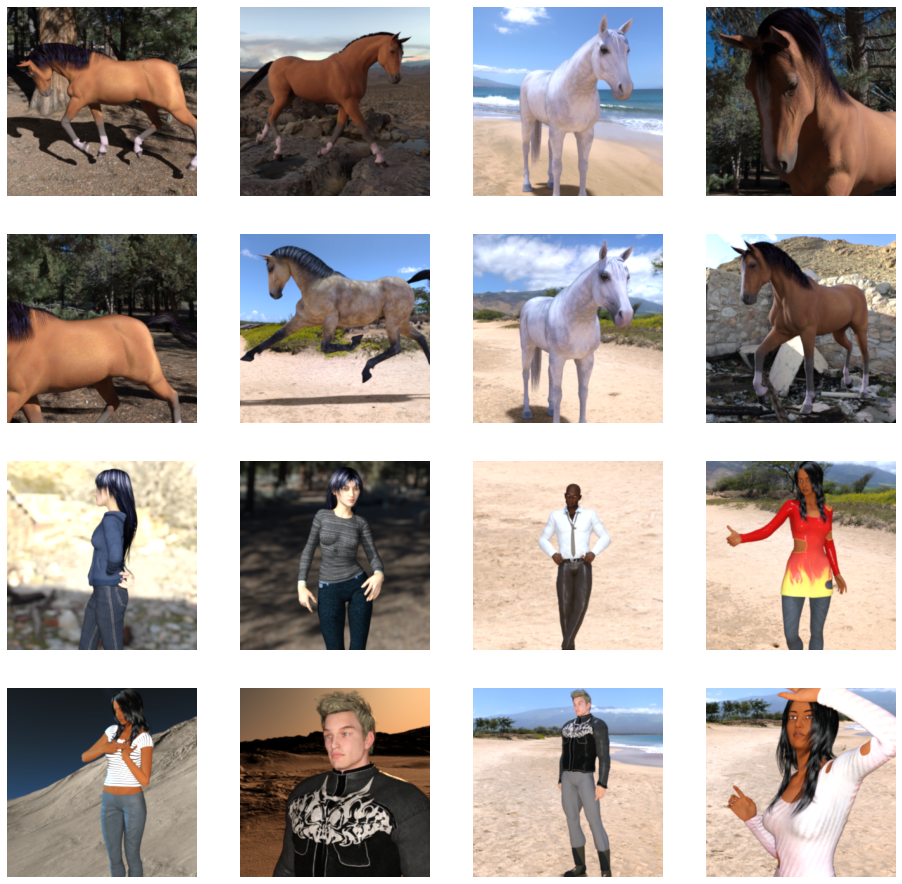

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


# Building a small model from scratch

In two-class classfication problem, we end out network with a sigmoid activation.  
(해당 이미지가 해당 클래스일 확률을 0과 1 사이로 내뱉음)

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
  # 1st Conv layer                                  
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),

  # 2nd Conv layer                                  
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  # 3rd Conv layer                                  
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  
  # 4th Conv layer                                  
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  
  # 5th Conv layer                                  
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  
  # Flatten the results to feed into a DNN
  tf.keras.layers.Flatten(),

  # 512 neuron hidden layer
  tf.keras.layers.Dense(512, activation='relu'),

  # Only 1 output neuron. It will contain a value from 0-1
  tf.keras.layers.Dense(1, activation='sigmoid')

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

# Data Preprocessing
Data generator 만들기

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    './horse-or-human',
    target_size=(300, 300), # All images will be resized to 300x300
    batch_size=128,
    # binary_crossentropy를 사용하므로 binary labels가 필요함
   class_mode='binary'
)

Found 1027 images belonging to 2 classes.


# Training

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 78s 9s/step - loss: 1.0373 - accuracy: 0.5284
Epoch 2/15
8/8 [==============================] - 88s 11s/step - loss: 0.7649 - accuracy: 0.5537
Epoch 3/15
8/8 [==============================] - 76s 9s/step - loss: 0.6792 - accuracy: 0.6496
Epoch 4/15
8/8 [==============================] - 76s 9s/step - loss: 0.6529 - accuracy: 0.8209
Epoch 5/15
8/8 [==============================] - 76s 9s/step - loss: 0.4334 - accuracy: 0.8754
Epoch 6/15
8/8 [==============================] - 76s 9s/step - loss: 0.1849 - accuracy: 0.9410
Epoch 7/15
8/8 [==============================] - 75s 9s/step - loss: 0.1400 - accuracy: 0.9511
Epoch 8/15
8/8 [==============================] - 76s 9s/step - loss: 0.5268 - accuracy: 0.8643
Epoch 9/15
8/8 [==============================] - 79s 10s/step - loss: 0.2124 - accuracy: 0.9333
Epoch 10/15
8/8 [==============================] - 85s 11s/step - loss: 0.0953 - accuracy: 0.9678
Epoch 11/15
8/8 [===================

Model Prediction

In [ ]:
## CODE BLOCK FOR NON-SAFARI BROWSERS
## SAFARI USERS: PLEASE SKIP THIS BLOCK AND RUN THE NEXT ONE INSTEAD

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
    
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Clean Up

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)